In [1]:
import pandas as pd 
import numpy as np
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, roc_auc_score
import seaborn as sns
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/times.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [42]:
import os
os.getcwd()

'c:\\Users\\jun99\\OneDrive - 계명대학교\\바탕 화면\\Analysis\\x\\code_0403'

In [37]:
train = pd.read_csv('../data_2023_1213/train_concat.csv')

ex1 = pd.read_excel('../data_0403/용인.xlsx')

In [4]:
len(ex1)

632

In [5]:
ex1[['pcr_urine','pcr_urine.1']].describe()

,pcr_urine,pcr_urine.1
count,632.000000,632.000000
mean,838.241297,0.838241
std,2134.380017,2.134379
min,26.000000,0.026000
25%,61.425000,0.061425
50%,109.800000,0.109800
75%,440.525000,0.440525
max,16468.100000,16.468100


In [6]:
ex1.columns = ['연구등록번호', '(실명)등록번호', 'age', 'sex', 'HTN', 'DM', 'tpro', 'alb', 'chol',
       'bun', 'cr', 'eGFR', 'glu', 'plt', 'blood_dip', 'protein_dip',
       'acr_urine', 'pcr_', 'pcr_urine', 'Dysmorphic RBC',
       'G1 dysmorphic', 'glu_urine', 'esterase_urine', 'RBC', 'WBC', 'Biopsy',
       'Reason', 'Biopsy_new', 'pred', 'pred_prob_1', 'pred_prob_0']
ex1.columns

Index(['연구등록번호', '(실명)등록번호', 'age', 'sex', 'HTN', 'DM', 'tpro', 'alb', 'chol',
       'bun', 'cr', 'eGFR', 'glu', 'plt', 'blood_dip', 'protein_dip',
       'acr_urine', 'pcr_', 'pcr_urine', 'Dysmorphic RBC', 'G1 dysmorphic',
       'glu_urine', 'esterase_urine', 'RBC', 'WBC', 'Biopsy', 'Reason',
       'Biopsy_new', 'pred', 'pred_prob_1', 'pred_prob_0'],
      dtype='object')

In [7]:
ex_copy = ex1[['age', 'sex', 'HTN', 'DM', 'plt', 'alb',
       'bun', 'cr', 'eGFR', 'blood_dip', 'protein_dip',
       'acr_urine', 'pcr_urine', 'glu', 'RBC', 'WBC','Biopsy','Biopsy_new']].copy()
print(ex_copy.columns)
ex_copy.head()

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu', 'RBC',
       'WBC', 'Biopsy', 'Biopsy_new'],
      dtype='object')


,age,sex,HTN,DM,plt,alb,bun,cr,eGFR,blood_dip,protein_dip,acr_urine,pcr_urine,glu,RBC,WBC,Biopsy,Biopsy_new
0,52,1,1,0,230,4.5,18.2,1.02,84.112709,2.0,1.0,328.3,0.8571,104,20,2,1,1
1,38,1,0,0,441,4.4,14.0,1.02,92.805164,3.0,3.0,1224.4,1.8593,88,20,2,0,1
2,43,1,1,1,196,4.5,9.8,0.62,121.494743,0.0,2.0,185.6,0.2984,276,2,2,0,0
3,41,1,1,0,283,4.1,25.6,1.44,59.890404,0.0,0.0,8.0,0.0382,104,2,2,0,0
4,62,1,0,0,186,4.4,14.2,0.65,104.269863,0.0,0.0,8.0,0.1232,90,2,2,0,0


In [8]:
print(train.shape)

print(ex_copy.shape)

(18513, 25)
(632, 18)


In [9]:
train_columns = set(train.columns)
ex1_columns = set(ex_copy.columns)

variable_difference = train_columns - ex1_columns
print(f"train 변수에서 validation 변수 제외한 변수들:{list(variable_difference)}")

train 변수에서 validation 변수 제외한 변수들:['RBC_re', 'WBC_binary', 'esterase_binary', 'esterase_urine', 'WBC_re', 'dysmorphism', 'tpro', 'glu_urine', 'RBC_binary', 'target', 'group']


In [10]:
train.columns = ['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target']

train.columns

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')

In [11]:
print(ex_copy['WBC'].value_counts())
ex_copy['RBC'].value_counts()

WBC
2     471
5      80
20     28
10     24
30     24
0       4
3       1
Name: count, dtype: int64


RBC
2     411
5      77
30     71
20     38
10     35
Name: count, dtype: int64

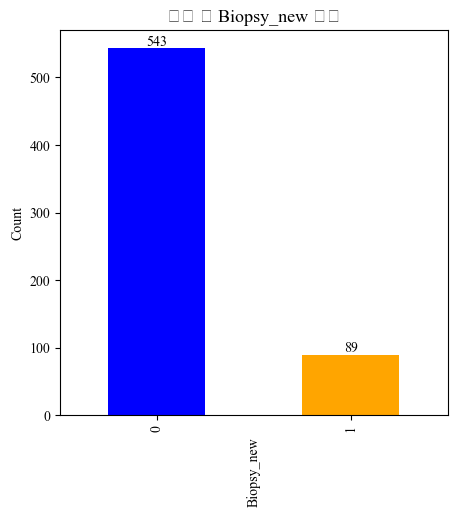

In [12]:
import matplotlib.pyplot as plt

# Bar plot of ex_copy.Biopsy_new
plt.figure(figsize=(5, 5))
ax = ex_copy['Biopsy_new'].value_counts().plot(kind='bar', color=['blue', 'orange'])
plt.xlabel('Biopsy_new', rotation='vertical')
plt.ylabel('Count')

# Add count labels
for i, count in enumerate(ex_copy['Biopsy_new'].value_counts()):
    plt.text(i, count, str(count), ha='center', va='bottom')

plt.title('변환 전 Biopsy_new 분포', fontsize=13)
plt.show()


In [13]:
test = ex_copy.drop(['Biopsy','Biopsy_new'], axis=1).copy()
test.head()

,age,sex,HTN,DM,plt,alb,bun,cr,eGFR,blood_dip,protein_dip,acr_urine,pcr_urine,glu,RBC,WBC
0,52,1,1,0,230,4.5,18.2,1.02,84.112709,2.0,1.0,328.3,0.8571,104,20,2
1,38,1,0,0,441,4.4,14.0,1.02,92.805164,3.0,3.0,1224.4,1.8593,88,20,2
2,43,1,1,1,196,4.5,9.8,0.62,121.494743,0.0,2.0,185.6,0.2984,276,2,2
3,41,1,1,0,283,4.1,25.6,1.44,59.890404,0.0,0.0,8.0,0.0382,104,2,2
4,62,1,0,0,186,4.4,14.2,0.65,104.269863,0.0,0.0,8.0,0.1232,90,2,2


## Modeling_Biopsy

In [14]:
xgb = XGBClassifier(random_state = 2023, n_jobs=-1)

In [15]:
print(test.columns)
print(train.columns)

Index(['age', 'sex', 'HTN', 'DM', 'plt', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu', 'RBC',
       'WBC'],
      dtype='object')
Index(['age', 'sex', 'HTN', 'DM', 'plt', 'tpro', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu',
       'glu_urine', 'esterase_urine', 'dysmorphism', 'RBC', 'WBC',
       'RBC_binary', 'WBC_binary', 'esterase_binary', 'group', 'target'],
      dtype='object')


In [16]:
column_difference = set(ex_copy.columns).difference(set(train.columns))
print(f'val - train:{column_difference}')

column_difference = set(train.columns).difference(set(ex_copy.columns))
print(f'train - val:{column_difference}')

val - train:{'Biopsy', 'Biopsy_new'}
train - val:{'WBC_binary', 'esterase_binary', 'esterase_urine', 'dysmorphism', 'tpro', 'glu_urine', 'RBC_binary', 'target', 'group'}


In [17]:
X_train = train.drop(['tpro', 'esterase_binary', 'group', 'dysmorphism', 'WBC_binary',
                       'esterase_urine', 'RBC_binary', 'target', 'glu_urine'], axis=1).copy()
y_train = train['target'].copy()

In [18]:
print(len(X_train.columns))
X_train.columns

16


Index(['age', 'sex', 'HTN', 'DM', 'plt', 'alb', 'bun', 'cr', 'eGFR',
       'blood_dip', 'protein_dip', 'acr_urine', 'pcr_urine', 'glu', 'RBC',
       'WBC'],
      dtype='object')

In [19]:
X_train.columns = ['Age','Sex','Hypertension','Type 2 Diabetes Mellitus','Platelet Count',
                   'Albumin','Blood Urea Nitrogen','Creatinine','Estimated Glomerular Filtration Rate',
                   'Blood dipstick','Protein dipstick', 'Urinary Albumin to Creatinine Ratio',
                   'Urinary Protein to Creatinine Ratio','Glucose','Red Blood Cell',
                   'White Blood Cell']
print(len(X_train.columns))

16


In [20]:
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=-1,
              num_parallel_tree=None, random_state=2023, ...)

### train 결과

In [21]:
import shap
explainer = shap.TreeExplainer(xgb)
shap_values = explainer.shap_values(X_train)

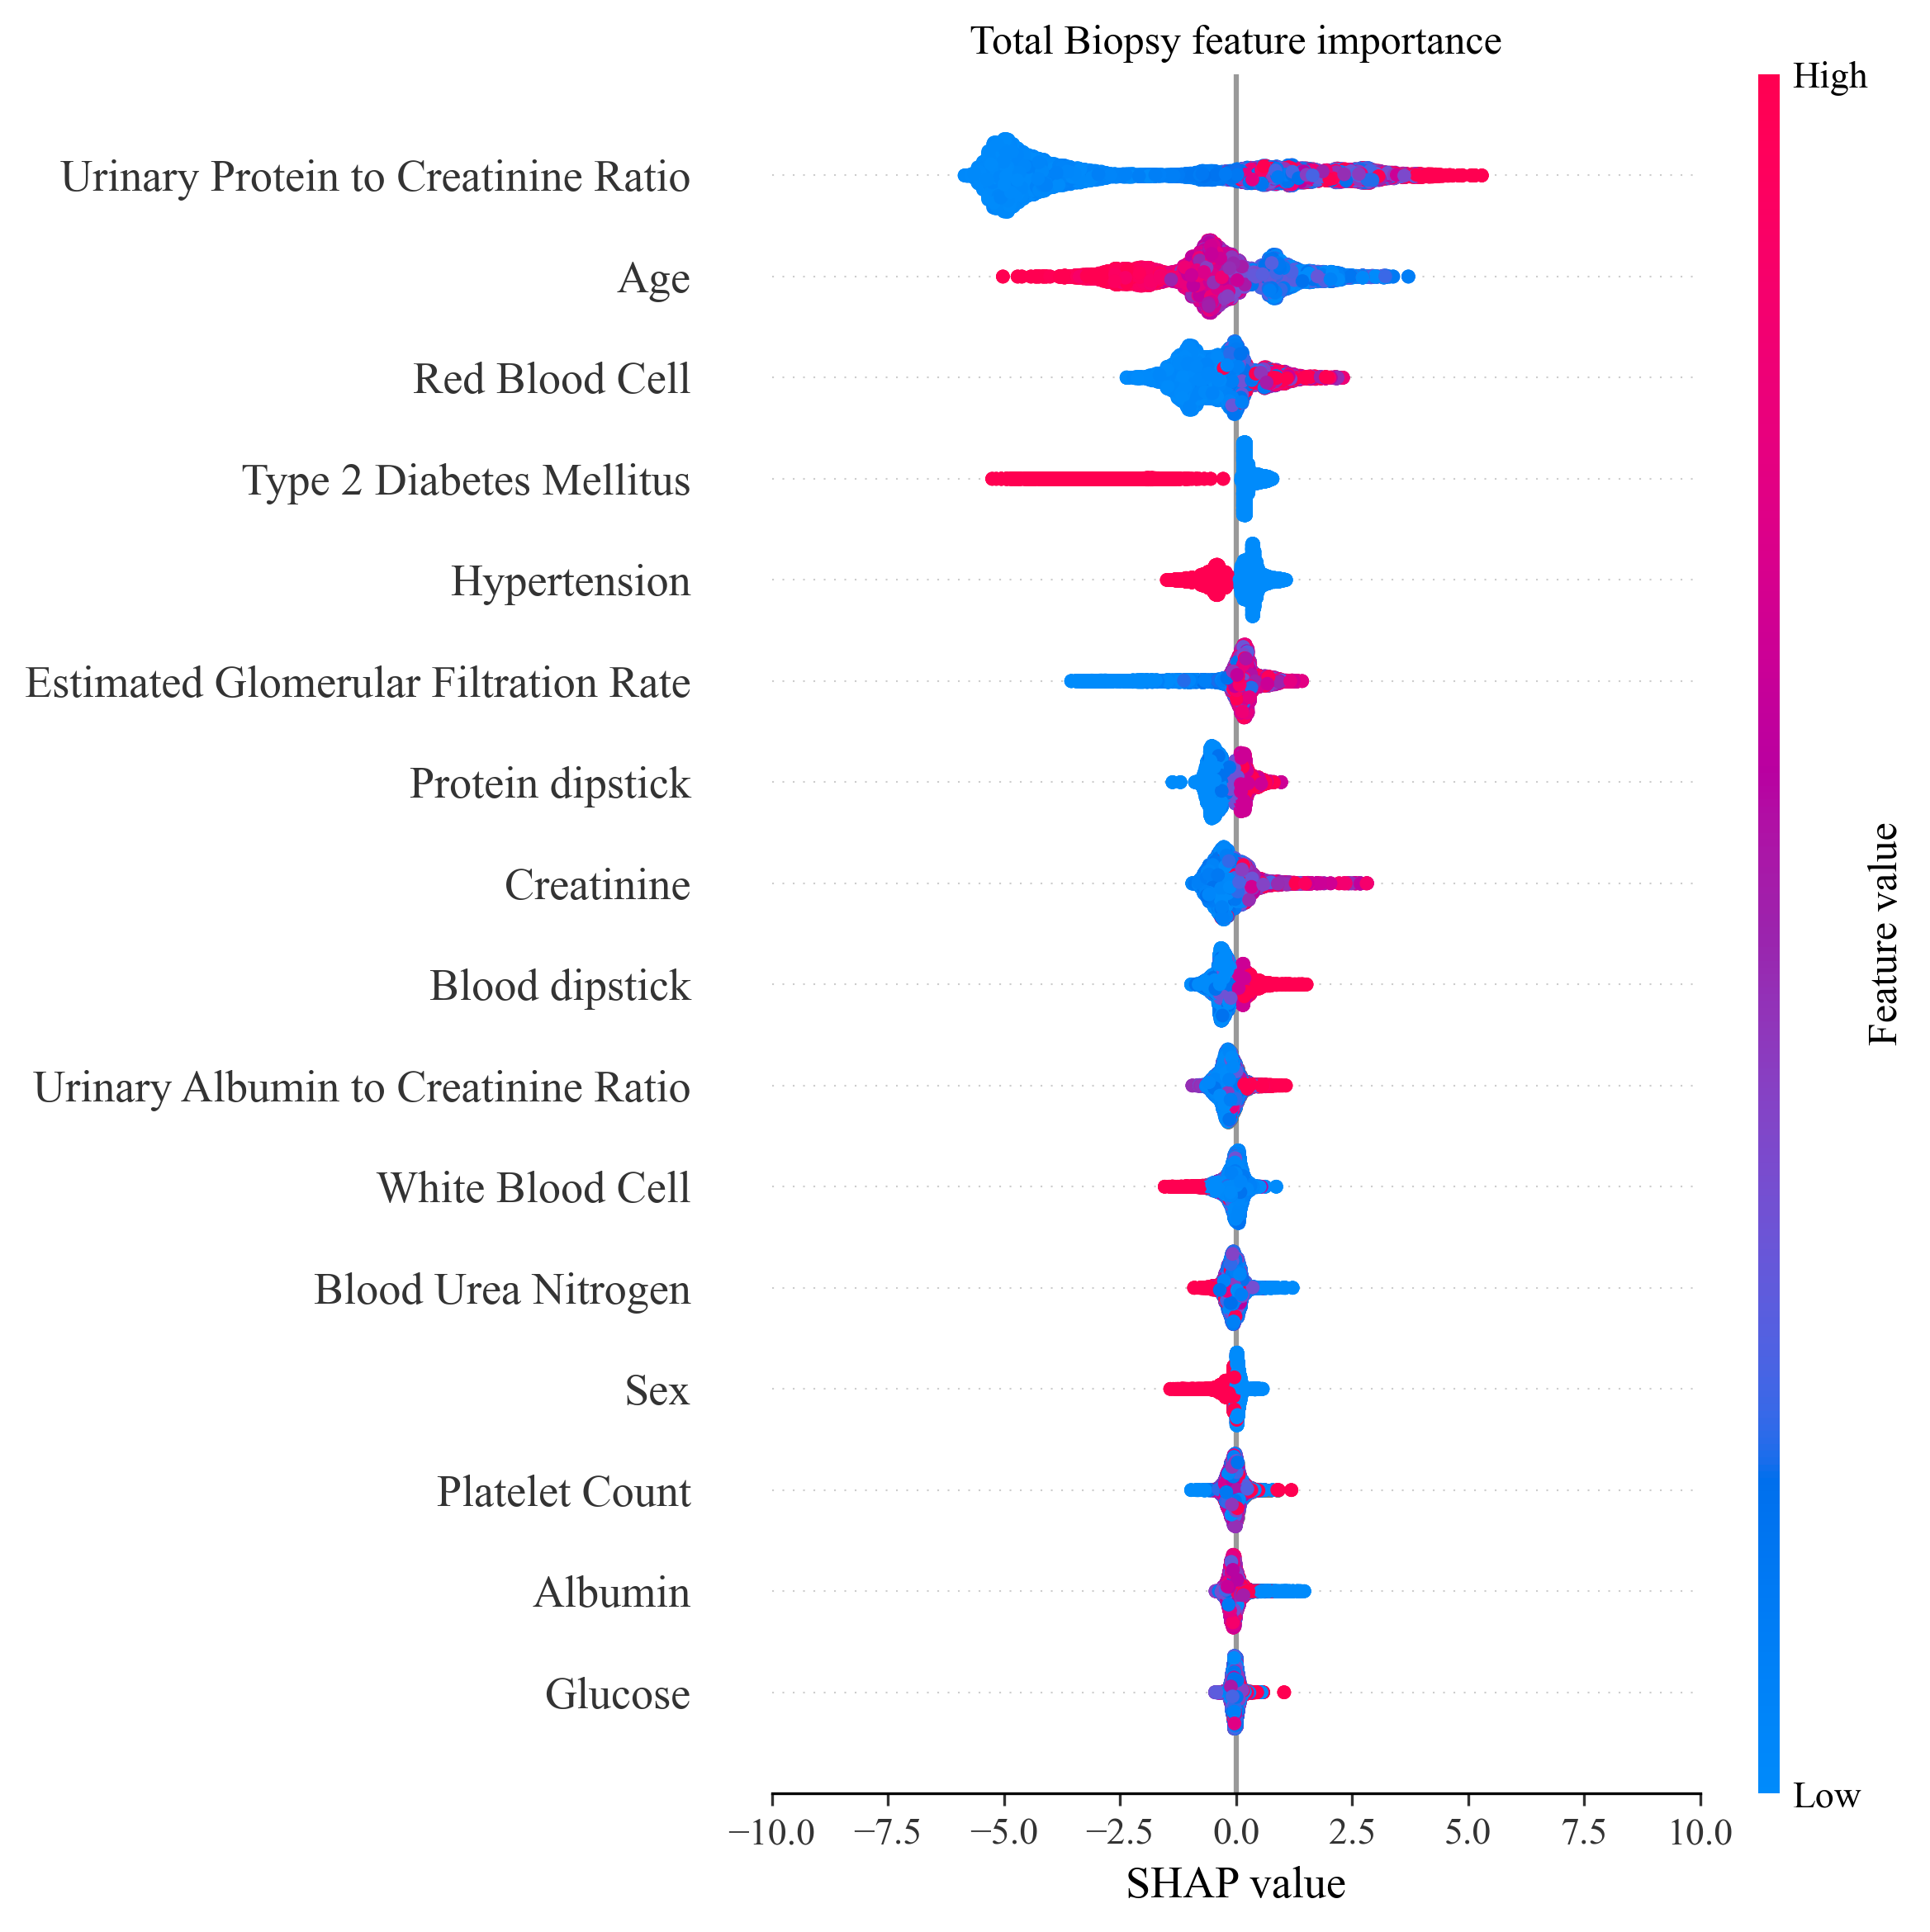

In [22]:
plt.figure(figsize=[10,10], dpi=300)

plt.title('Total Biopsy feature importance')
shap.summary_plot(shap_values, X_train, show=False)

# Get the current axis
ax = plt.gca()

# Set the xticks using numpy.arange to handle float values
ax.set_xticks(np.arange(-10.0, 11.0, 2.5))

plt.xlabel('SHAP value')
plt.show()

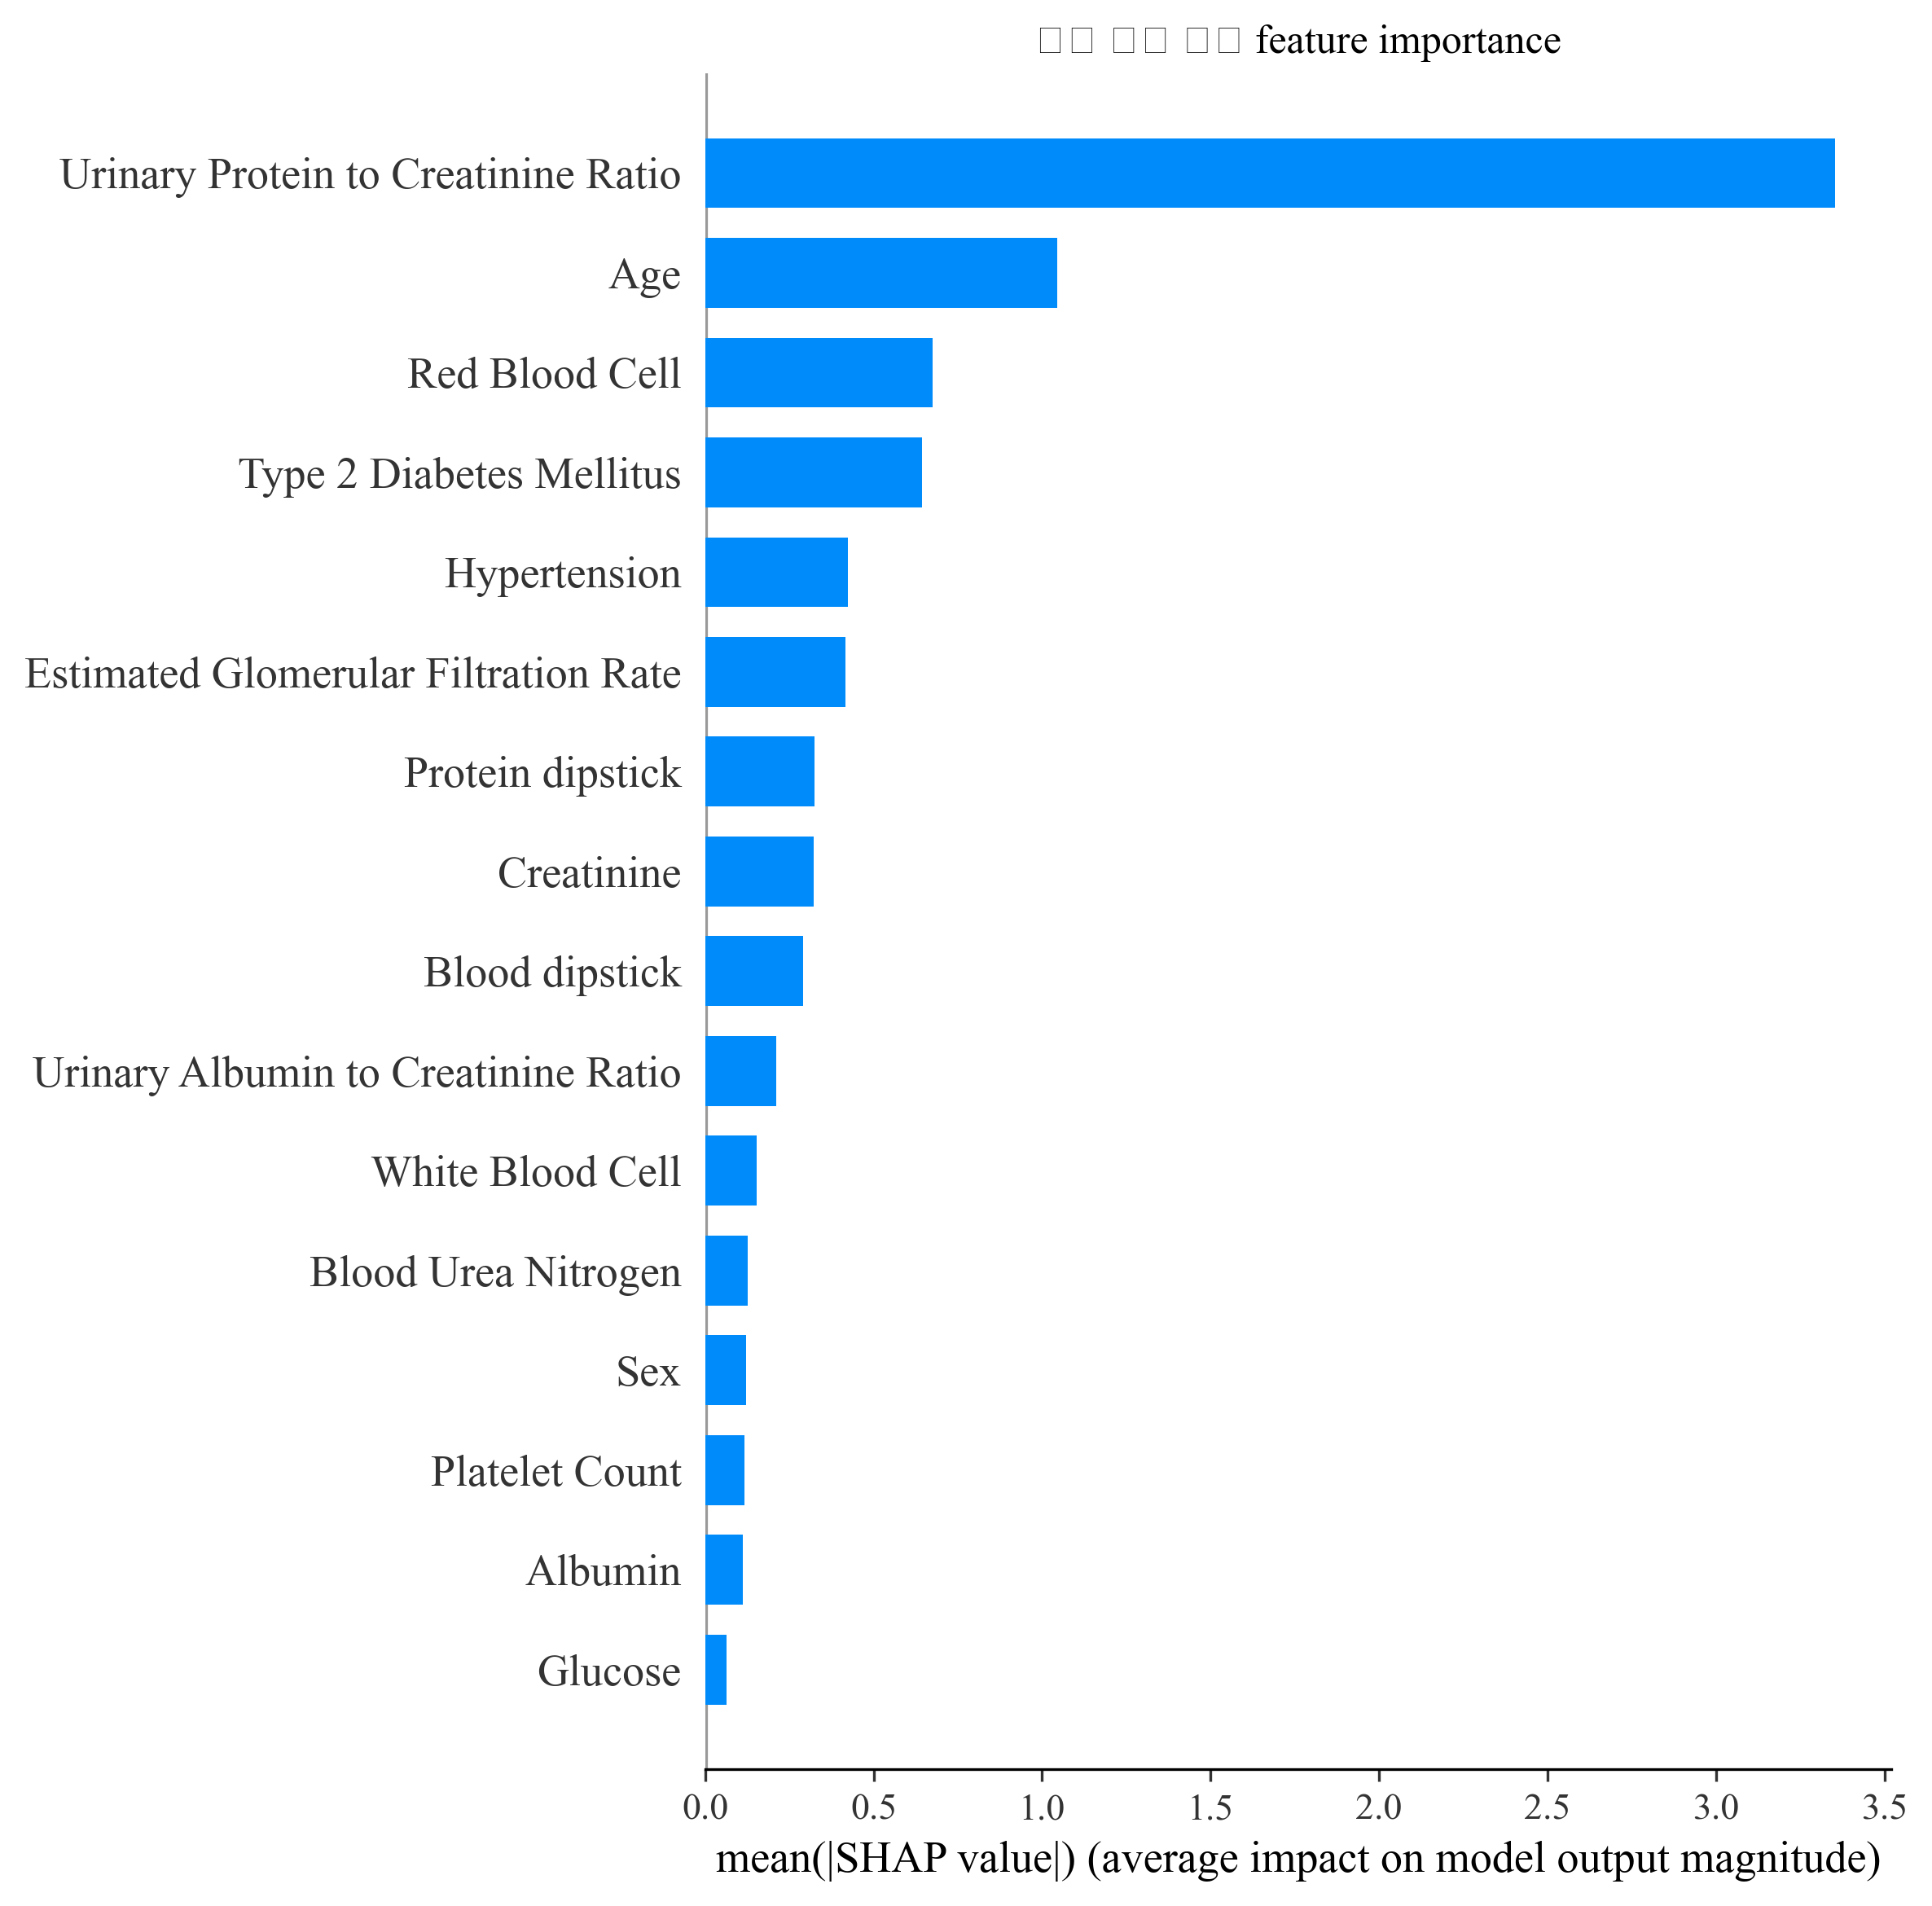

In [23]:
plt.figure(figsize=[10,10], dpi=300)

plt.title('합산 의사 모형 feature importance')
shap.summary_plot(shap_values, X_train, plot_type="bar")
plt.show()